# Hands-on Machine Learning Examples

### R libraries used in this notebook
* RColorBrewer
* caret

### Key learning areas
* Use the `RColorBrewer` library to display colour pictures
* Use `lm()` command to perform linear regression
* Use `function()` command to create an equation
* Implement k-nearest neighbours by the `knn3()` function of the `caret` package

## 1. Setup `RColorBrewer`

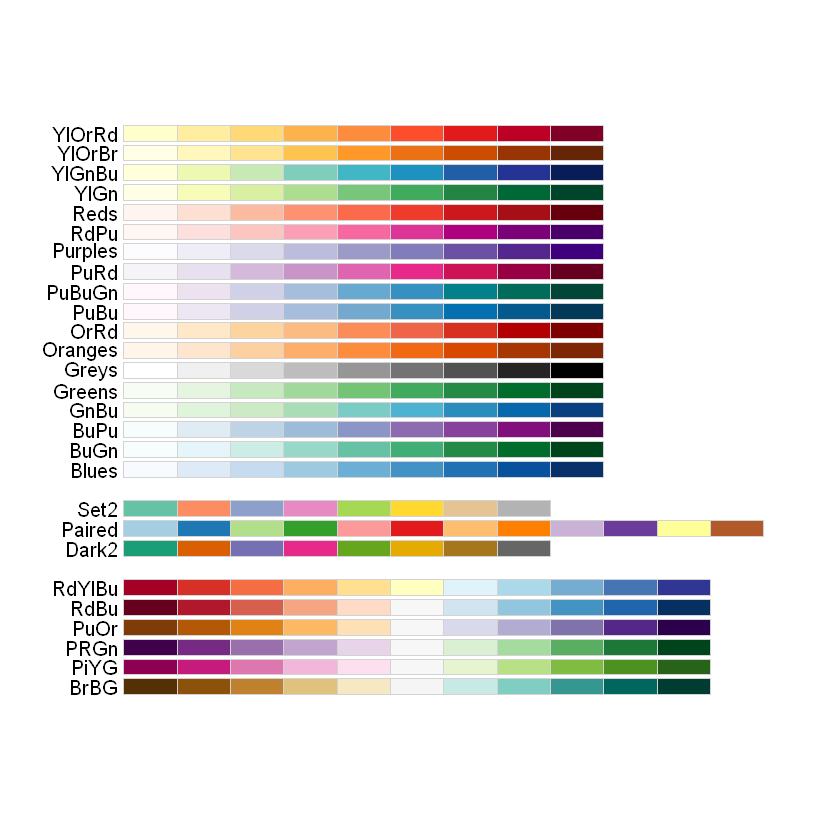

In [2]:
library("RColorBrewer")
display.brewer.all(colorblindFriendly = TRUE)

To learn more about `RColorBrewer` library, try the following link:

https://www.datanovia.com/en/blog/the-a-z-of-rcolorbrewer-palette/#visualize-a-specific-brewer-palette

In [3]:
colours<-brewer.pal(n = 12, name = "Paired")

## 1. Polynomial curve fitting

The **target** (dependent) variable $y$ depends on the **featurear** variable $x$ in a non-linear way $sin(2{\pi}x)$ according to the equation below:

$$y_i=f(x_i)+\epsilon_i = sin(2{\pi}x_i) + \epsilon_i, ~~~~~ i = 1, ..., 15$$

where $x_i$s take  values in $[0,1]$ and $\epsilon_i$s are independent normally distributed variables, $N(0, 0.3^2)$.

Hence,

$$y_i \sim N(f(x_i),0.3^2))$$

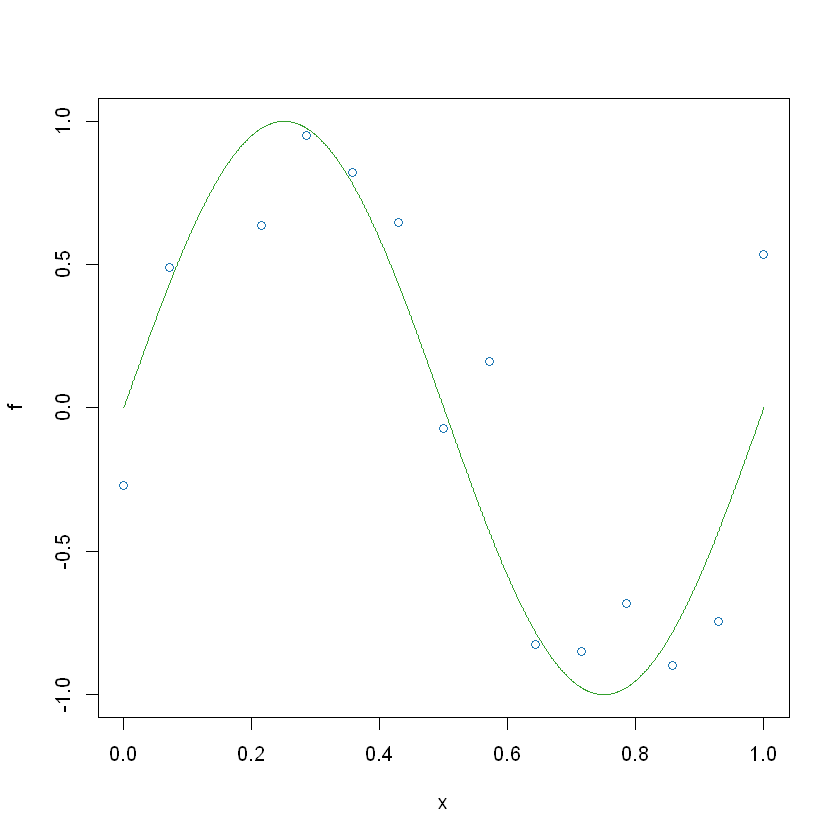

In [34]:
# Generate the observations
# The green line represents the noise free part of y
# The blue points consist of 15 noisy observations

set.seed(2)
x <- seq(0,1,length=1000)
f <- sin(2*pi*x)                                           # Theoretical value of y
xo <- seq(0,1,length=15)
fo <- sin(2*pi*xo)
y <- rnorm(15,fo,0.3) 
plot(x, f, xlab='x', ylab='f', col=colours[4], type='l')   # plot the green line
points(xo, y, col=colours[2])                              # plot the 15 observations

We start with a polynomial of first order (linear) to approximate the green line by using least squares estimator. We use the command `lm()` in `R`.

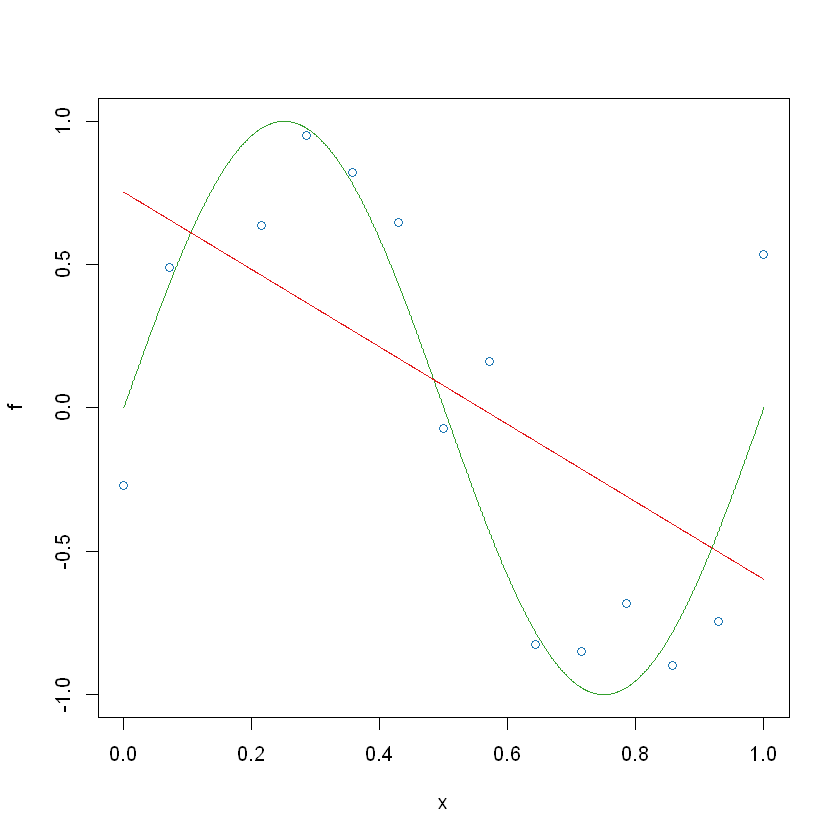

In [23]:
# Perform linear regression

fit1 <- lm(y~xo)
pol1 <- function(x) fit1$coefficients[2]*x + fit1$coefficients[1]
plot(x, f, xlab='x', ylab='f', col=colours[4], type='l')
lines(x, pol1(x), col=colours[6])
points(xo, y, col=colours[2])

We check the performance of the linear model by measuring how 'far' are its predictions from the unknown noise free part of $y$ (green line) by the **mean square error** (**MSR**) that squares all these deviations and then averages them. This defines the **loss function**. In practice, we will not have access to the noise free version of $y$ (green line) but we will have access to a noise version of it, which we will call the test dataset.

In [39]:
# Calculate MSR for the linear model

mse1 <- mean((f-pol1(x))^2)
mse1

[1] 0.2282854

We now repeat the previous process with a 3rd degree polynomial.

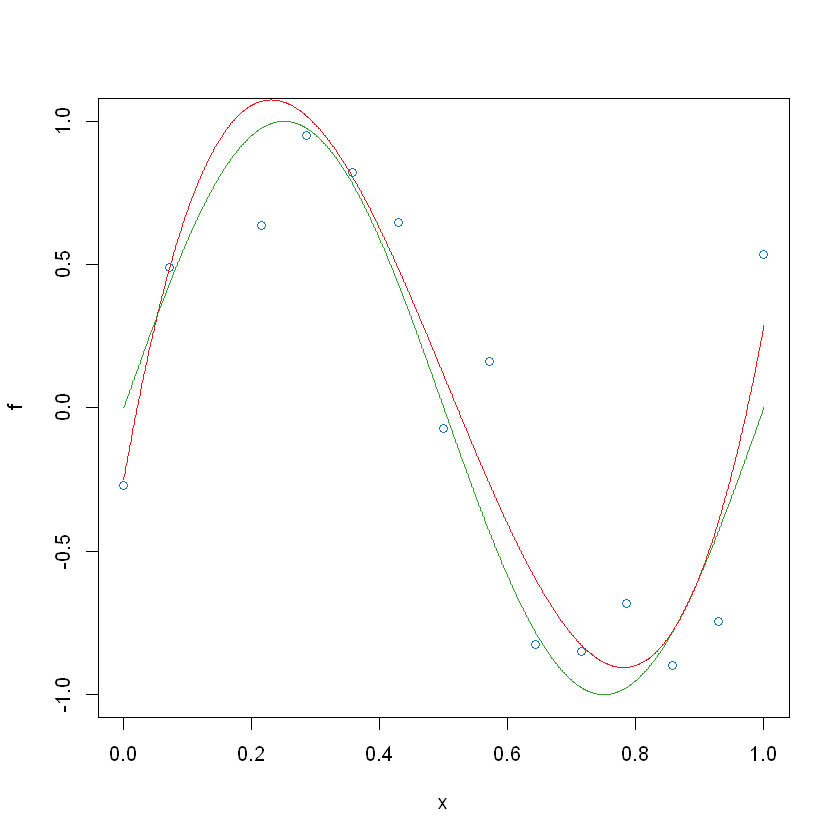

In [38]:
# Fit a 3rd degree polynomial

fit3 <- lm(y ~ xo + I(xo^2) + I(xo^3))
pol3 <- function(x) fit3$coefficients[4]*x^3 + fit3$coefficients[3]*x^2 + fit3$coefficients[2]*x + fit3$coefficients[1]
plot(x, f, xlab='x', ylab='f', col=colours[4], type='l')
lines(x, pol3(x), col=colours[6])
points(xo, y, col=colours[2])

In [40]:
# Calculate MSR for the 3rd degree polynomial

mse3 = mean((f-pol3(x))^2)
mse3

[1] 0.01247674

## 2. k-nearest neighbours

The dataset used was obtained from the following website:

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [12]:
data <- read.csv("Data/Wine/Wine quality.csv")

In [13]:
y <- data$wine
y <- as.factor(y)
x <- cbind(data$pH, data$alcohol)
table(y)

y
  red white 
 1599  4898 

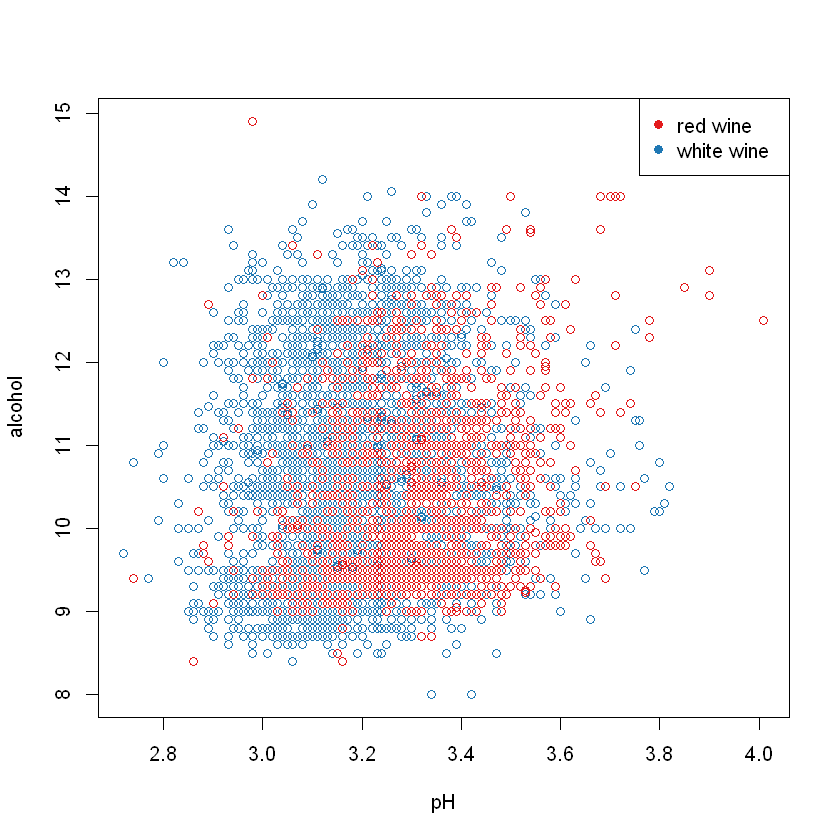

In [14]:
colours2<-colours[c(6,2)]
plot(x[,1],x[,2],col=colours2[y],xlab='pH',ylab='alcohol')
legend('topright', legend=c('red wine','white wine'), col= colours2, pch = 19)

In [16]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [17]:
knn_model <- knn3(x, y, k = 1)
knn_pred <- predict(knn_model, x, type = "class")

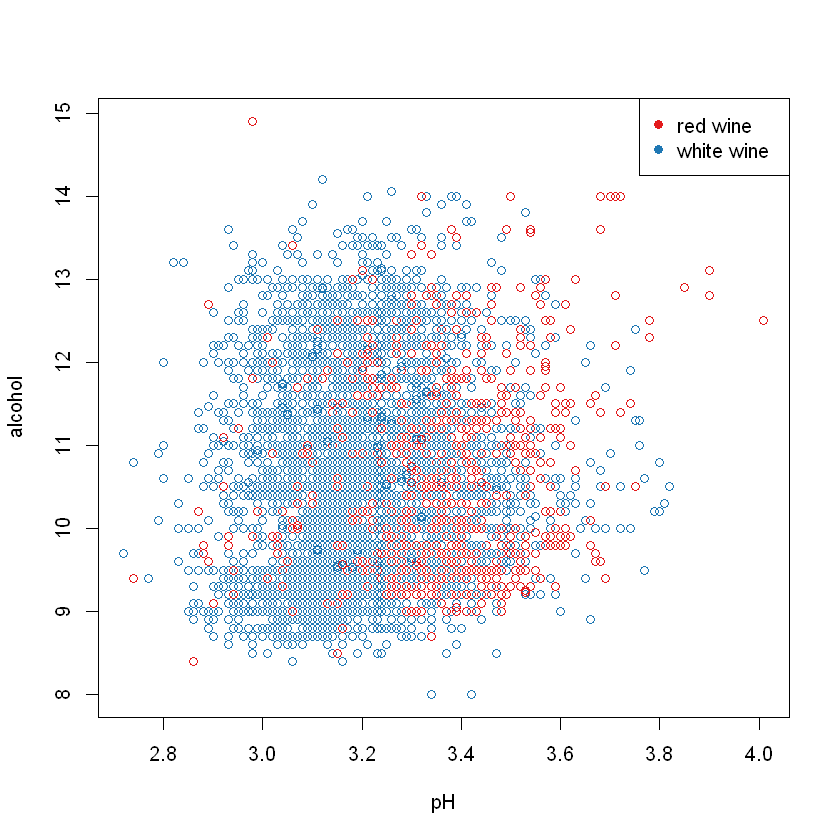

In [18]:
colours2<-colours[c(6,2)]
plot(x[,1],x[,2],col=colours2[knn_pred],xlab='pH',ylab='alcohol')
legend('topright', legend=c('red wine','white wine'), col= colours2, pch = 19)

In [19]:
confusionMatrix(knn_pred, y)

Confusion Matrix and Statistics

          Reference
Prediction  red white
     red   1025   319
     white  574  4579
                                          
               Accuracy : 0.8626          
                 95% CI : (0.8539, 0.8708)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6086          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6410          
            Specificity : 0.9349          
         Pos Pred Value : 0.7626          
         Neg Pred Value : 0.8886          
             Prevalence : 0.2461          
         Detection Rate : 0.1578          
   Detection Prevalence : 0.2069          
      Balanced Accuracy : 0.7879          
                                          
       'Positive' Class : red             
                     